In [1]:
import os
import numpy as np
import pandas as pd

from pathlib import *
from fastai.vision import *

In [2]:
# Create paths
path = Path("C:/Users/Chirag/Desktop/Kaggle/Practice/Pothole")

In [3]:
normal_path = path/"normal"
pothole_path = path/"potholes"

In [4]:
# Verify and delete images it can not open
verify_images(path=normal_path, delete=True)

In [5]:
verify_images(path=pothole_path, delete=True)

In [6]:
fastai_data = ImageDataBunch.from_folder(path, train=".",
                                         valid_pct=0.2, ds_tfms=get_transforms(), 
                                         size=300, num_workers=4, 
                                         bs=32).normalize(imagenet_stats)

(['normal', 'potholes'], 2, 526, 131)

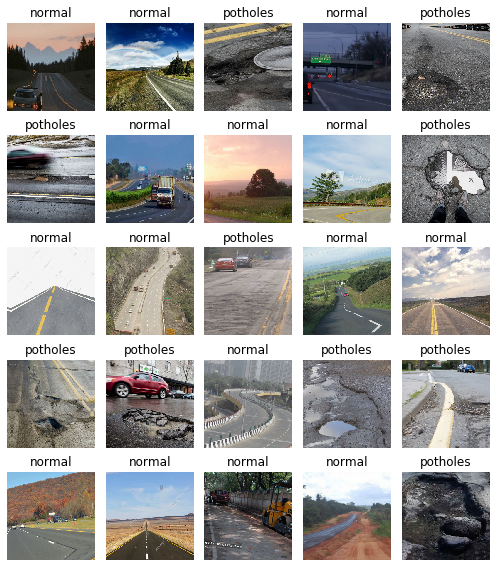

In [7]:
fastai_data.show_batch(figsize=(7,8))
fastai_data.classes, fastai_data.c, len(fastai_data.train_ds), len(fastai_data.valid_ds)

In [8]:
learn = cnn_learner(fastai_data, models.resnet50, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.241158,0.132115,0.038168,20:29
1,0.220628,0.060542,0.015267,20:47
2,0.178337,0.047321,0.022901,20:17
3,0.132561,0.048609,0.030534,20:30


In [10]:
# Save model before unfreezing
learn.save('stage1')

In [11]:
def plot_confusion_matrix(learner):
    """
    Ploting a confusion matrix using a fastai cnn learner
    """
    interp = ClassificationInterpretation.from_learner(learner)
    interp.plot_confusion_matrix()

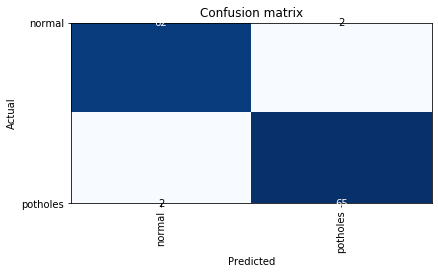

In [12]:
plot_confusion_matrix(learn)

## Thank You